# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Boosting Descent, KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting Descent, KNN, Random Forest, and Confusion Matrices.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df = pd.read_csv('HR_Dataset.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [6]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
2511,0.50,0.78,3,228,2,0,0,0,RandD,low
6217,0.80,0.55,3,206,2,0,0,0,technical,low
11684,0.69,0.85,3,153,10,0,0,0,support,medium
11871,0.77,0.68,3,98,3,0,0,0,support,medium
3411,0.52,0.85,5,183,3,0,0,0,support,low
14192,0.49,0.89,4,201,8,0,0,0,sales,medium
6263,0.90,0.87,4,231,5,0,0,0,management,low
12644,0.58,0.62,4,238,3,0,1,0,hr,low
7759,0.75,0.82,3,227,2,0,0,0,support,medium
8720,0.98,0.88,4,145,2,0,0,0,sales,low


In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<i><b><u>Employees who left the company had</u></b><i/>
* low satisfaction level, 
* low promotion rate,
* low salary,
* and worked more compare to who stayed in the company.

In [8]:
df_left = df[df['left']==1]

In [9]:
df_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df_left.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
1,0.440098,0.718113,3.855503,207.41921,3.876505,0.047326,0.005321


In [11]:
df_left.groupby('Departments').agg({'left':'count'}).sort_values('left',ascending=False)

,left
Departments,
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121


In [12]:
df_not_left = df[df['left']==0]

In [13]:
df_not_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [14]:
df_not_left.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.66681,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251


In [15]:
df_not_left.groupby('Departments').agg({'left':'count'}).sort_values('left',ascending=False)

,left
Departments,
sales,3126
technical,2023
support,1674
IT,954
product_mng,704
RandD,666
marketing,655
accounting,563
management,539


In [16]:
df['Departments'].value_counts(dropna=False)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments, dtype: int64

In [17]:
df.groupby('left')['Departments'].describe()

,count,unique,top,freq
left,,,,
0,11428,10,sales,3126
1,3571,10,sales,1014


In [18]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

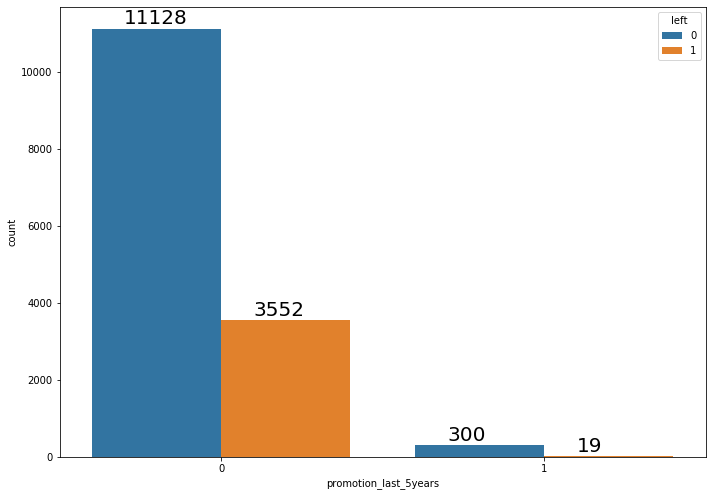

In [19]:
# How does years of experience affect employee churn?
plt.figure(figsize = (10, 7))
g = sns.countplot(df['promotion_last_5years'], hue = df['left'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.10, p.get_height()+120), size = 20)
plt.tight_layout()

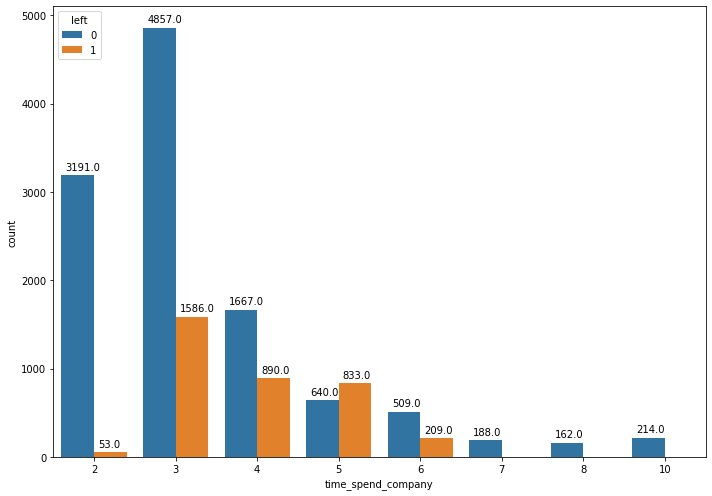

In [20]:
# How does years of experience affect employee churn?
plt.figure(figsize = (10, 7))
g = sns.countplot(df['time_spend_company'], hue = df['left'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.05, p.get_height()+60), size = 10)
plt.tight_layout()

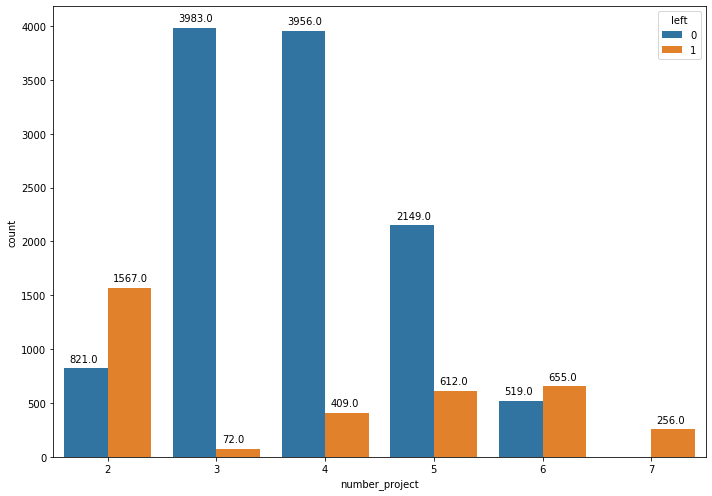

In [21]:
# How does counts of project affect employee churn?
plt.figure(figsize = (10, 7))
g = sns.countplot(df['number_project'], hue = df['left'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.05, p.get_height()+60), size = 10)
plt.tight_layout()

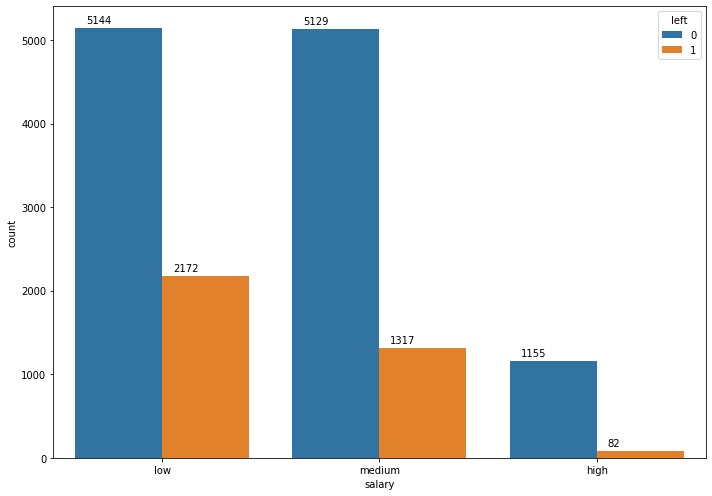

In [22]:
# How does the salary level affect employee churn?
plt.figure(figsize = (10, 7))
g = sns.countplot(df['salary'],hue='left',data=df)
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.05, p.get_height()+60), size = 10)
plt.tight_layout()

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [23]:
df['left'].value_counts(dropna=False)

0    11428
1     3571
Name: left, dtype: int64

In [24]:
df['left'].value_counts(dropna=False)/df['left'].shape[0]

0    0.761917
1    0.238083
Name: left, dtype: float64

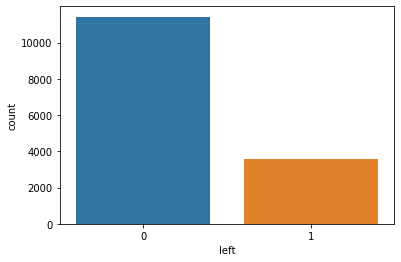

In [25]:
sns.countplot(df['left'])

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [26]:
df['number_project'].value_counts(dropna=False)

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

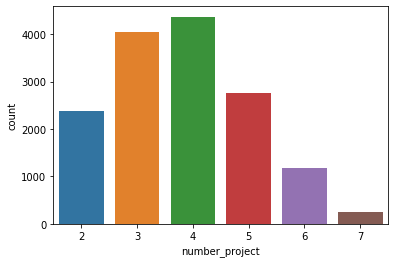

In [27]:
sns.countplot(df['number_project'])

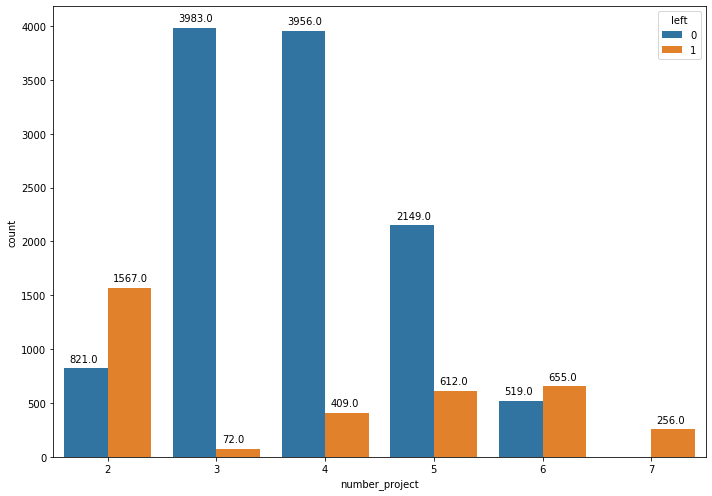

In [28]:
# How does counts of project affect employee churn?
plt.figure(figsize = (10, 7))
g = sns.countplot(df['number_project'], hue = df['left'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.05, p.get_height()+60), size = 10)
plt.tight_layout()

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


In [29]:
df['time_spend_company'].value_counts(dropna=False)

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

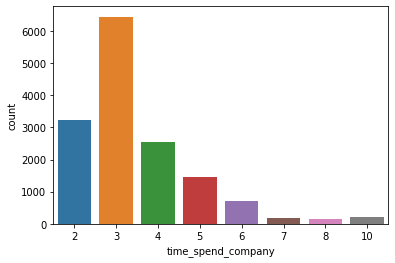

In [30]:
sns.countplot(df['time_spend_company'])

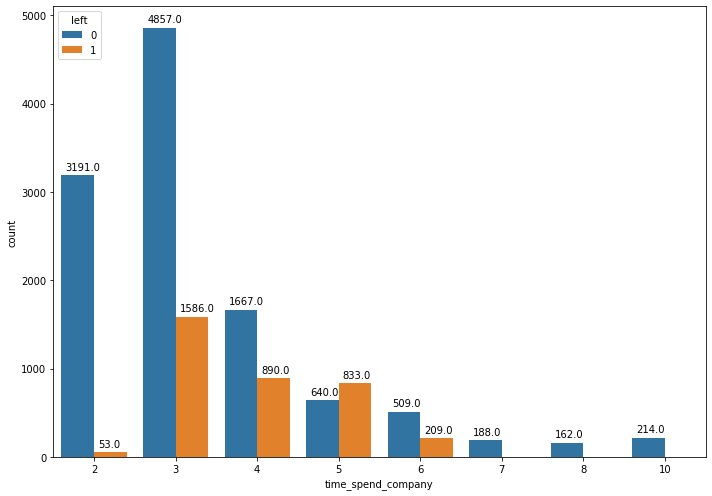

In [31]:
# How does years of experience affect employee churn?
plt.figure(figsize = (10, 7))
g = sns.countplot(df['time_spend_company'], hue = df['left'])
plt.xticks(rotation = 0)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+ 0.05, p.get_height()+60), size = 10)
plt.tight_layout()

### Subplots of Features

You can use the methods of the matplotlib.

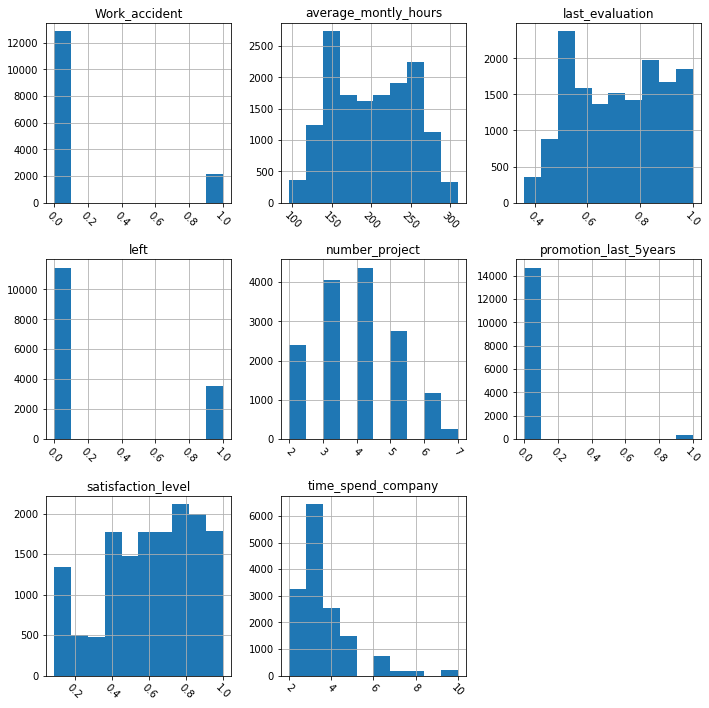

In [32]:
df.hist(figsize=(10,10), xrot=-45)
plt.tight_layout()

In [33]:
df['salary'].value_counts(dropna=False)

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

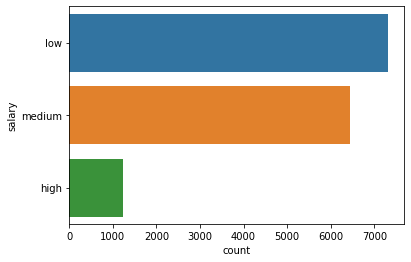

In [34]:
for feature in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(data=df, y='{}'.format(feature))

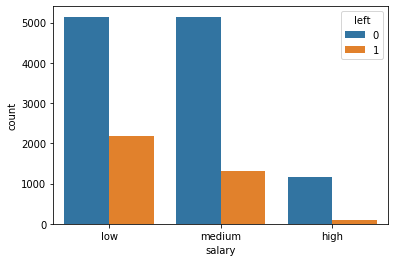

In [35]:
# How does the salary level affect employee churn?
sns.countplot(df['salary'],hue='left',data=df) 

## Collectively related graphics

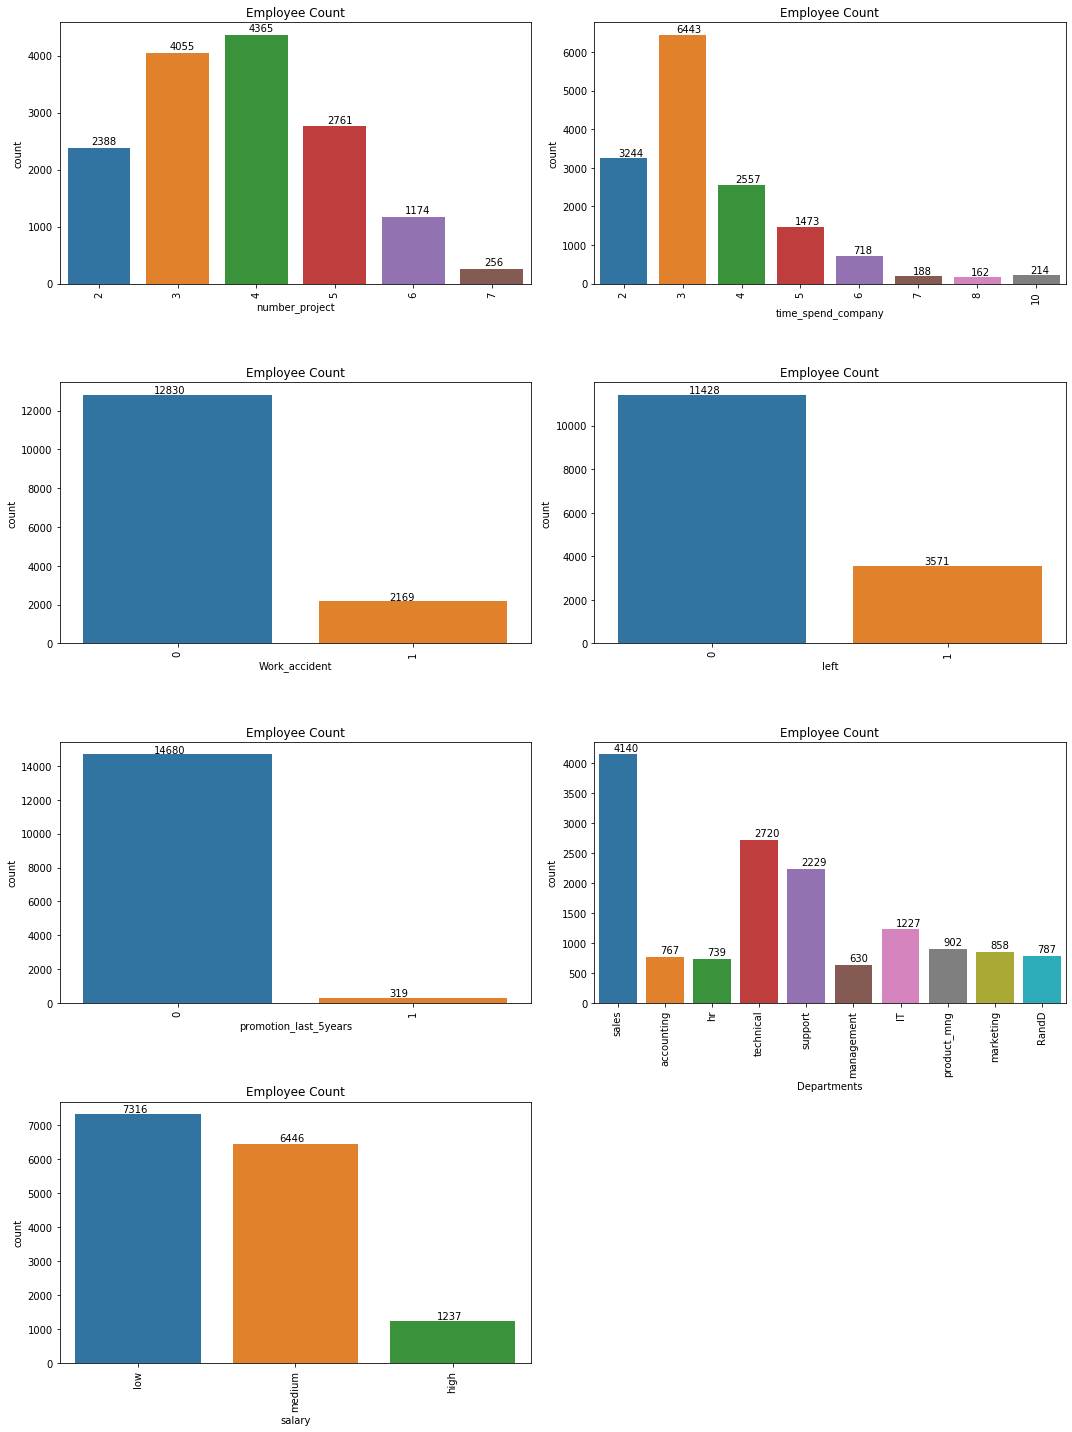

In [36]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments','salary']
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.2)
    g=sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("Employee Count")
    for p in g.patches:
        g.annotate((p.get_height()), (p.get_x()+ 0.30, p.get_height()+60), size = 10)
plt.tight_layout()

<i><b><u>Information obtained from graphics</u></b><i/>

* Most of the employee is doing the project from 3-5.
* There is a huge drop between 3 years and 4 years experienced employee.
* The employee count left is 23 % of the total employment.
* A decidedly less number of employee get the promotion in the last 5 year.
* The sales department is having maximum no.of employee followed by technical and support
* Most of the employees are getting salary either medium or low.

## Graphical representation of the churn status according to the relevant parameters

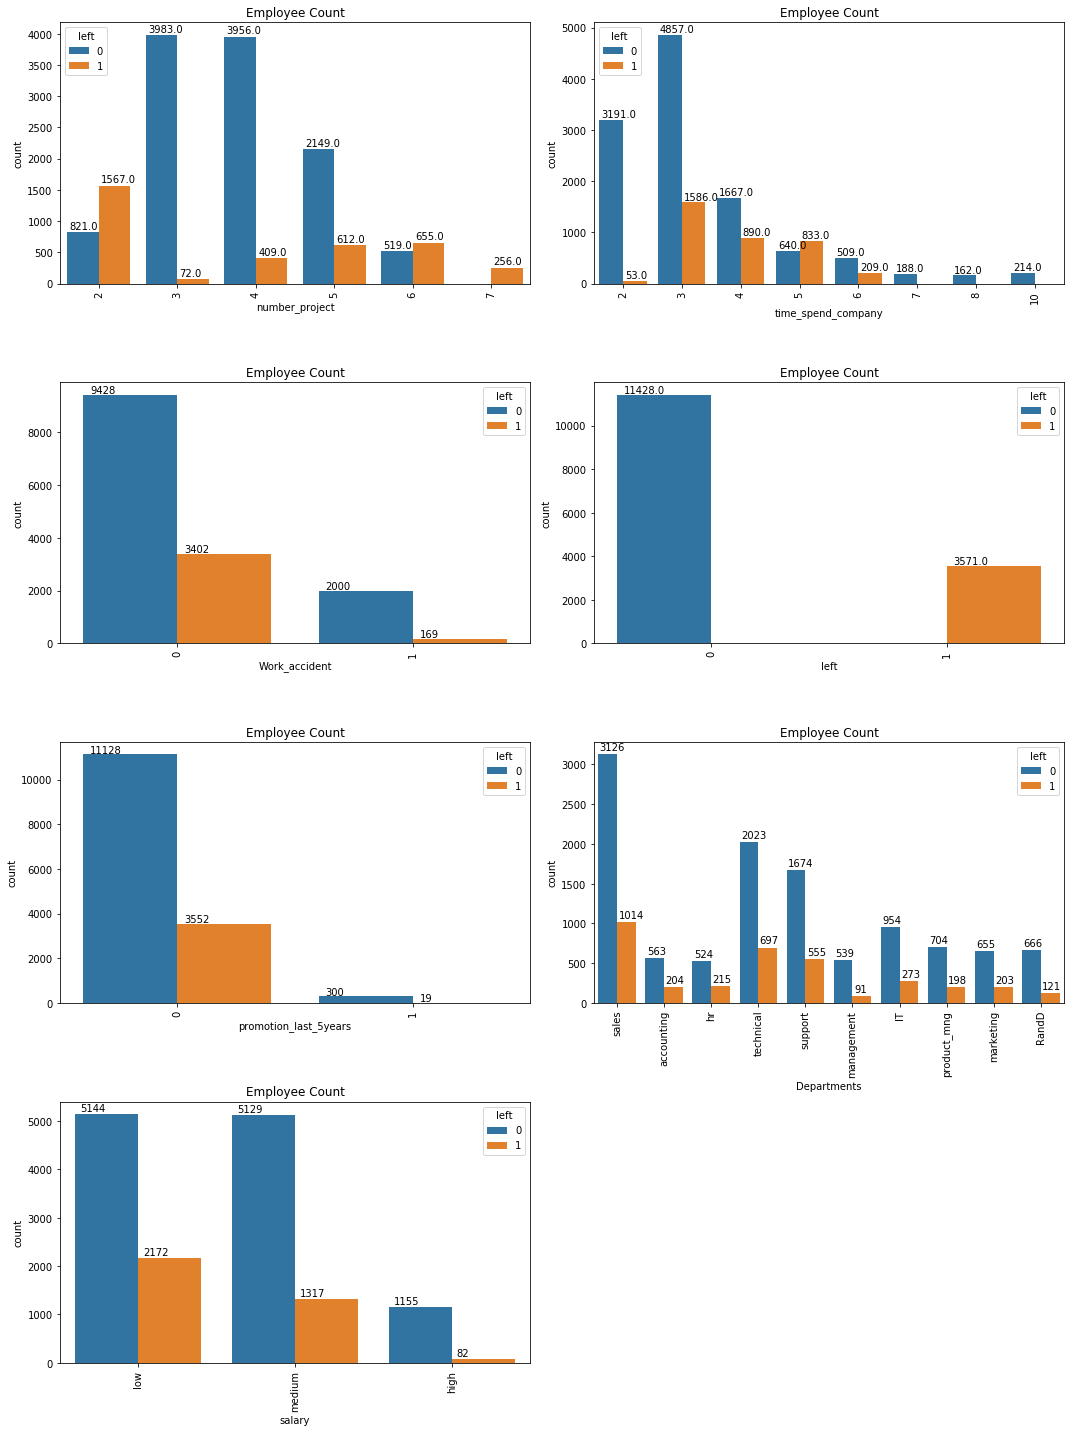

In [37]:
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    g=sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("Employee Count")
    for p in g.patches:
        g.annotate((p.get_height()), (p.get_x()+ 0.03, p.get_height()+50), size = 10)
plt.tight_layout()

<i><b><u>Information obtained from graphics</u></b><i/>

* The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
* The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
* Those who promotion in last 5 years they didn't leave, all those left they didn't get the promotion in the previous 5 years.

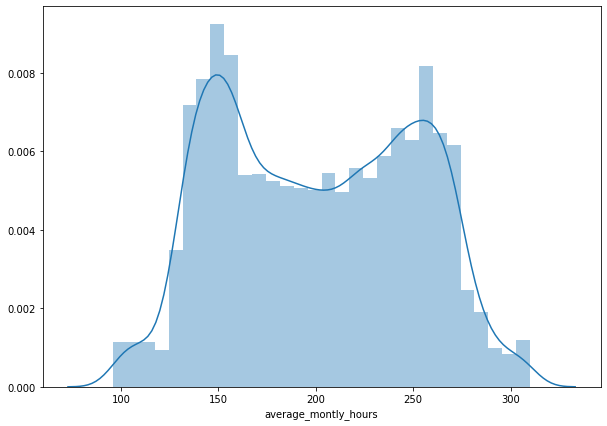

In [38]:
plt.figure(figsize = (10, 7))
sns.distplot(df['average_montly_hours'], hist = True)

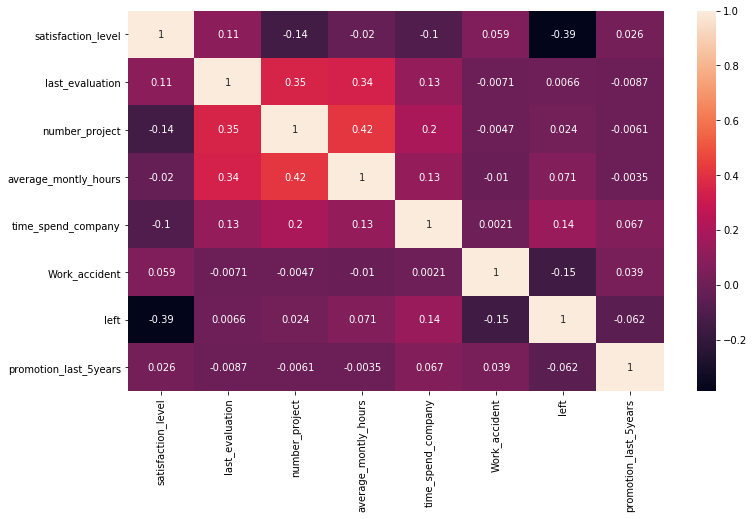

In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

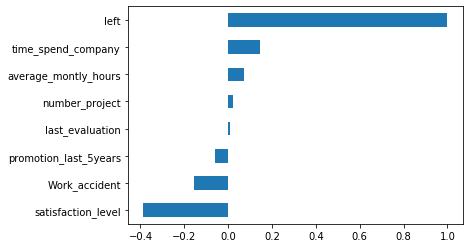

In [40]:
df.corr()['left'].sort_values().plot.barh()

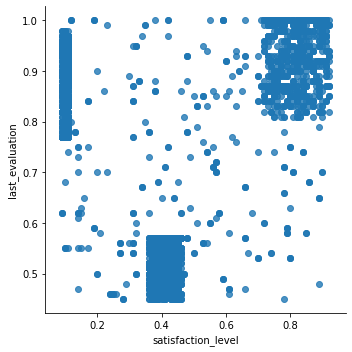

In [41]:
sns.lmplot(x='satisfaction_level',
          y='last_evaluation',
          data=df[df.left==1],
          fit_reg=False
         )

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [42]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#df['salary'] = labelencoder.fit_transform(df['salary'])  # values don't match correctly.
#df.head()

In [43]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [44]:
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})

In [45]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [46]:
dummies = pd.get_dummies(df['Departments'])
df = df.drop(['Departments'],axis=1)
df = pd.concat([df,dummies], axis=1)

In [47]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  int64  
 9   IT                     14999 non-null  uint8  
 10  RandD                  14999 non-null  uint8  
 11  accounting             14999 non-null  uint8  
 12  hr                     14999 non-null  uint8  
 13  management             14999 non-null  uint8  
 14  marketing              14999 non-null  uint8  
 15  pr

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [49]:
dfc = df.drop('left', axis = 1)
labels = df['left']

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dfsc = sc.fit_transform(dfc)

In [51]:
dfsc

array([[-0.93649469, -1.08727529, -1.46286291, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       [ 0.75281433,  0.84070693,  0.97111292, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       [-2.02247906,  0.95755433,  2.59376348, ...,  1.61955144,
        -0.41779149, -0.4706553 ],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.61745492,
         2.39353848, -0.4706553 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.61745492,
         2.39353848, -0.4706553 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.61745492,
         2.39353848, -0.4706553 ]])

In [52]:
dfsc = pd.DataFrame(dfsc)
dfsc.columns = dfc.columns

In [53]:
dfsc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.636092,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.636092,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,-0.933368,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655


In [54]:
dfc  # without scale

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,0,1,0


#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [55]:
from sklearn.cluster import KMeans
from pyclustertend import hopkins

In [56]:
hopkins(dfsc, dfsc.shape[0])

0.055564290062593696

In [57]:
ssd = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((dfsc))
    ssd.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

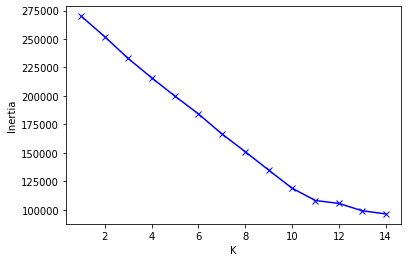

In [58]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")

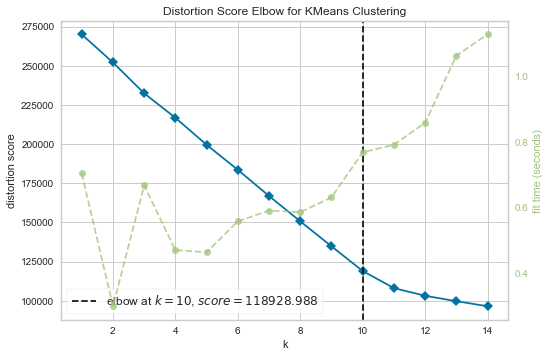

In [59]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,15))
visu.fit(dfsc)
visu.poof()

In [60]:
kmeans = KMeans(n_clusters = 10).fit(dfsc)

In [61]:
labels = kmeans.labels_

In [62]:
dfsc['clusters'] = labels

In [63]:
dfsc['clusters'].value_counts()

1    4140
2    2720
0    2229
4    1227
6     902
7     858
8     787
3     767
9     739
5     630
Name: clusters, dtype: int64

In [64]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [65]:
print(f'Silhouette Score(n=10): {silhouette_score(dfsc, labels)}')

Silhouette Score(n=10): 0.36642989550520394


In [66]:
kmeans = KMeans(n_clusters = 2).fit(dfsc)

In [67]:
labels = kmeans.labels_

In [68]:
dfsc['clusters2'] = labels

In [69]:
dfsc['clusters2'].value_counts()

1    9856
0    5143
Name: clusters2, dtype: int64

In [70]:
print(f'Silhouette Score(n=2): {silhouette_score(dfsc, labels)}')

Silhouette Score(n=2): 0.311105930684405


In [71]:
dfsc['labels'] = df['left']

In [72]:
dfsc[['clusters', 'clusters2', 'labels']].sample(20)

,clusters,clusters2,labels
3453,1,1,0
11464,1,1,0
5621,0,1,0
9138,0,1,0
4727,8,0,0
6357,1,1,0
14430,6,0,1
7010,4,0,0
3058,2,1,0
3290,7,0,0


## Alternative: 
### Cluster allocated taking into account the degree of "satisfaction_level" and "last_evaluation"

In [73]:
df[['satisfaction_level','last_evaluation','left']].sample(20)

,satisfaction_level,last_evaluation,left
6636,0.65,0.60,0
6899,0.86,1.00,0
12461,0.43,0.50,1
13276,0.43,0.96,0
13069,0.53,0.77,0
14209,0.33,0.65,0
5041,0.97,0.63,0
1180,0.77,0.89,1
11547,0.42,0.80,0
1365,0.10,0.83,1


In [74]:
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]

In [75]:
left_emp

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [76]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(left_emp)

In [77]:
df_scaled

array([[-0.22773328, -0.9517667 ],
       [ 1.36379989,  0.71788783],
       [-1.25086175,  0.81907901],
       ...,
       [-0.26562693, -0.9517667 ],
       [-1.25086175,  1.22384375],
       [-0.26562693, -1.00236229]])

In [78]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = left_emp.columns

In [79]:
df_scaled

,satisfaction_level,last_evaluation
0,-0.227733,-0.951767
1,1.363800,0.717888
2,-1.250862,0.819079
3,1.060651,0.768483
4,-0.265627,-1.002362
...,...,...
3566,-0.151946,-0.749384
3567,-0.265627,-1.204745
3568,-0.265627,-0.951767
3569,-1.250862,1.223844


In [80]:
hopkins(df_scaled, df_scaled.shape[0])

0.03740791239094876

In [81]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    ssd.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

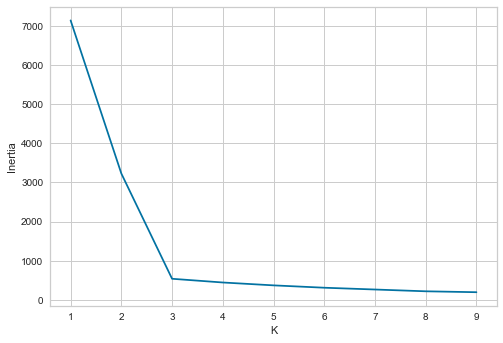

In [82]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')

In [83]:
from yellowbrick.cluster import KElbowVisualizer

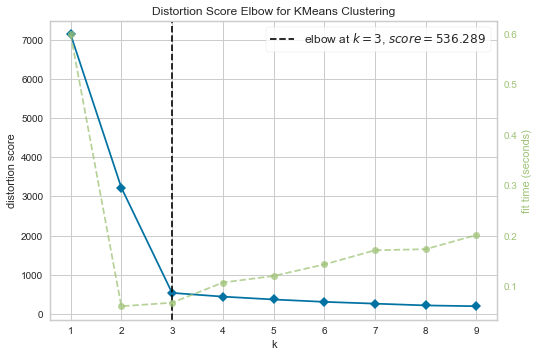

In [84]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df_scaled)
visu.poof()

In [85]:
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3).fit(left_emp)

In [86]:
# Add new column "label" annd assign cluster labels.
#left_emp['label'] = kmeans.labels_

label = kmeans.labels_

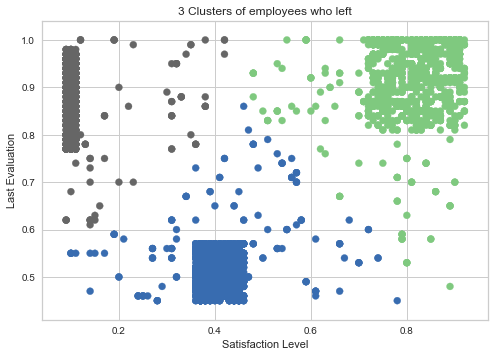

In [87]:
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=label, cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [88]:
left_emp['label'] = label

In [89]:
left_emp

,satisfaction_level,last_evaluation,label
0,0.38,0.53,1
1,0.80,0.86,0
2,0.11,0.88,2
3,0.72,0.87,0
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,2


In [90]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [91]:
print(print(f'Silhouette Score(n=3): {silhouette_score(left_emp,label)}'))

Silhouette Score(n=3): 0.9129069104375154
None


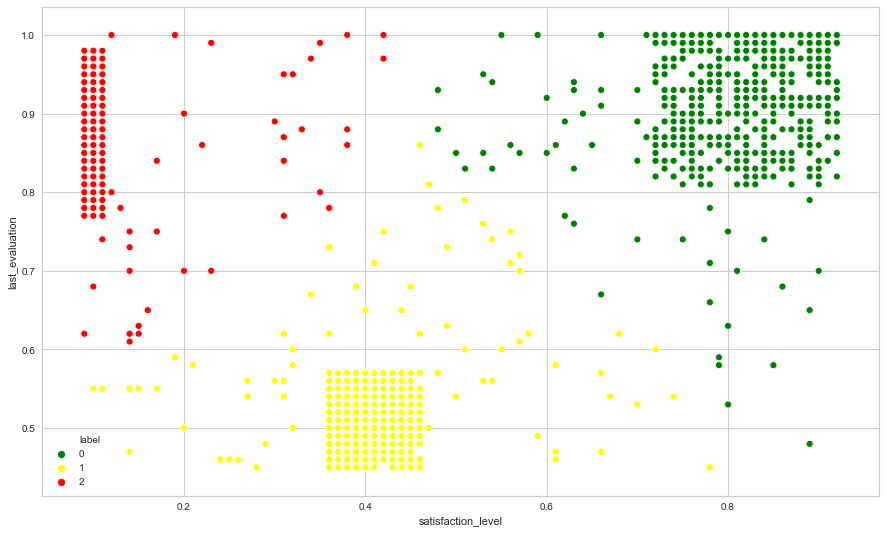

In [92]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='label', data=left_emp, palette=['green','yellow', 'red'], legend='full')

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
from sklearn.metrics import confusion_matrix,classification_report

In [95]:
X = df.drop('left',axis=1)
y = df['left']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

## Smothe

In [97]:
from collections import Counter

In [98]:
counter = Counter(y_train)
print(counter)

Counter({0: 8000, 1: 2499})


**Oversampling**

In [99]:
#pip install imbalanced-learn

In [100]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [101]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)

In [102]:
from imblearn.pipeline import Pipeline

In [103]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [104]:
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)

In [105]:
counter = Counter(y_smote)
print(counter)

Counter({0: 5714, 1: 4000})


### clustering after smoothe

In [106]:
ssd = []

K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_smote)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

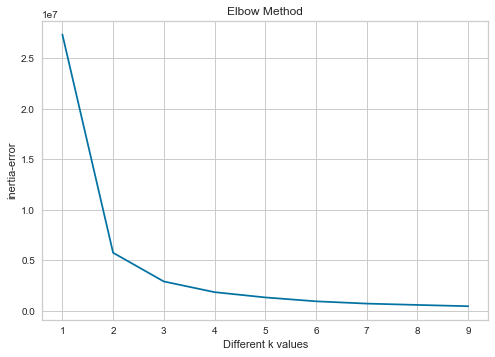

In [107]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")

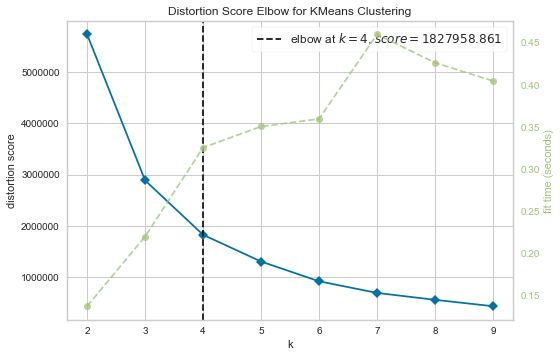

In [108]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 10))
visu.fit(X_smote)
visu.poof()

In [109]:
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(left_emp)

In [110]:
clusters = kmeans.labels_

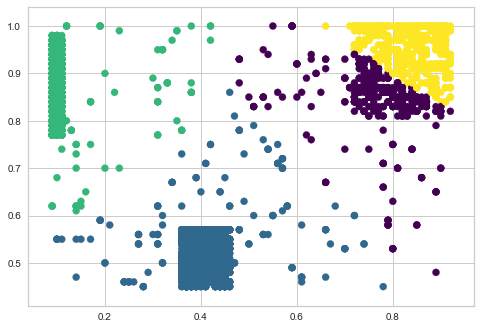

In [111]:
plt.scatter(left_emp.iloc[:,0], left_emp.iloc[:,1], c = clusters, s = 50, cmap = "viridis");

In [112]:
centroids = kmeans.cluster_centers_

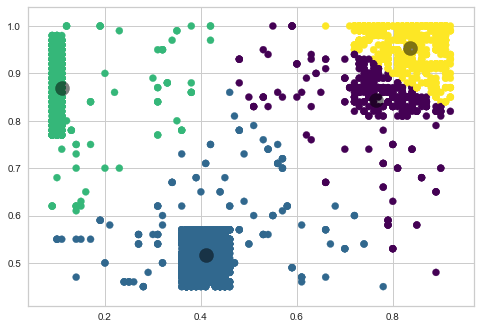

In [113]:
plt.scatter(left_emp.iloc[:,0], left_emp.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "black", s = 200, alpha=0.5);

### #Gradient Boosting Classifier

#### Model Building

In [114]:
 from sklearn.ensemble import GradientBoostingClassifier

In [115]:
gbc = GradientBoostingClassifier()

In [116]:
gbc.fit(X_smote, y_smote)

GradientBoostingClassifier()

In [117]:
y_pred = gbc.predict(X_test)

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [118]:
# pip install yellowbrick

In [119]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[3367,   61],
       [  80,  992]], dtype=int64)

Text(0.5, 29.5, 'Predicted Label')

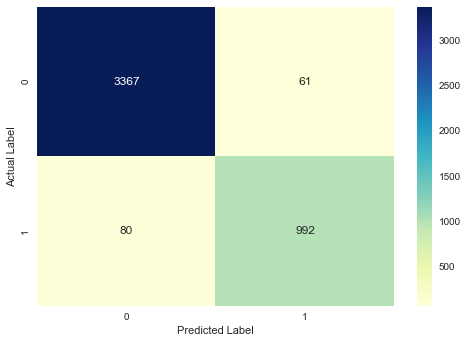

In [120]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

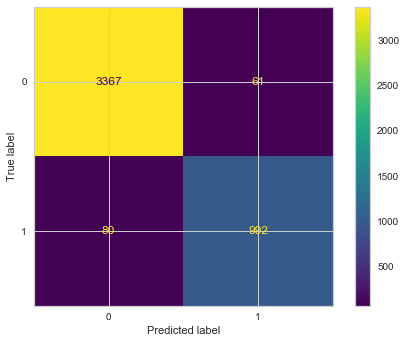

In [121]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc,X_test,y_test,values_format='d');

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3428
           1       0.94      0.93      0.93      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [123]:
gbc.score(X_test,y_test)

0.9686666666666667

#### Prediction

In [124]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [125]:
compare.sample(20)

,Actual,Pred
12123,1,1
4074,0,0
14094,0,0
8273,0,0
5080,0,0
9646,0,0
3208,0,0
7034,0,0
5034,0,0
4404,0,0


### #KNeighbors Classifier

#### Model Building

In [126]:
from sklearn.preprocessing import scale, StandardScaler

In [127]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_smote)
X_test_sc = sc.transform(X_test)

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
model = KNeighborsClassifier(n_neighbors = 1)

In [130]:
model.fit(X_train_sc,y_smote)

KNeighborsClassifier(n_neighbors=1)

In [131]:
y_pred = model.predict(X_test_sc)

#### Evaluating Model Performance

In [132]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[3265,  163],
       [  52, 1020]], dtype=int64)

Text(0.5, 29.5, 'Predicted Label')

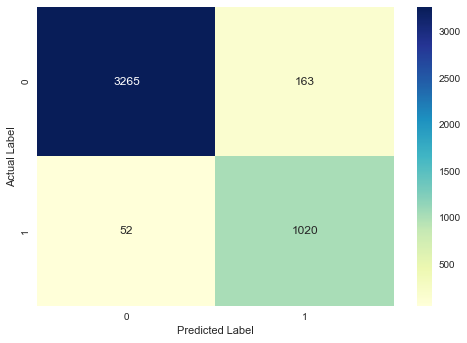

In [133]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

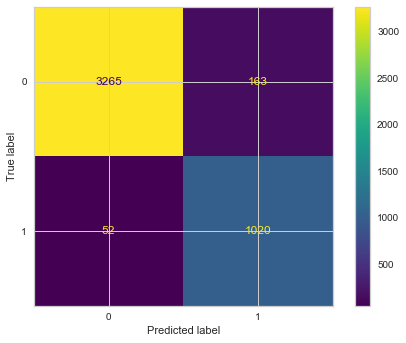

In [134]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test_sc,y_test,values_format='d');

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3428
           1       0.86      0.95      0.90      1072

    accuracy                           0.95      4500
   macro avg       0.92      0.95      0.94      4500
weighted avg       0.96      0.95      0.95      4500



#### Prediction

In [136]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [137]:
compare.sample(20)

,Actual,Pred
13223,0,1
11828,0,0
11033,0,0
11004,0,0
944,1,1
170,1,1
6220,0,0
3608,0,0
9502,0,0
10464,0,0


### #Random Forest Classifier

#### Model Building

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
X = df.drop('left',axis=1)
y = df['left']

In [140]:
rf_model = RandomForestClassifier().fit(X_smote, y_smote)

In [141]:
y_pred = rf_model.predict(X_test)

#### Evaluating Model Performance

In [142]:
confusion_matrix(y_test, y_pred)

array([[3409,   19],
       [  45, 1027]], dtype=int64)

In [143]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[3409,   19],
       [  45, 1027]], dtype=int64)

Text(0.5, 29.5, 'Predicted Label')

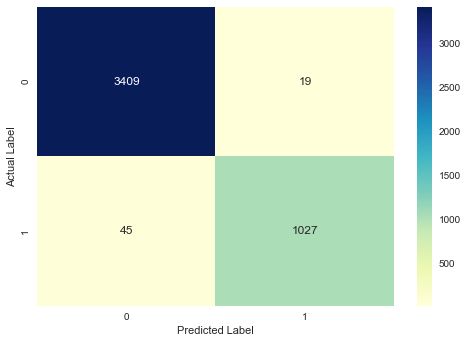

In [144]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3428
           1       0.98      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



#### Prediction

In [146]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [147]:
compare.sample(20)

,Actual,Pred
11799,0,0
1418,1,1
1254,1,1
1602,1,1
8803,0,0
8121,0,0
5848,0,0
1643,1,1
12717,1,1
12061,1,1


## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [148]:
import pickle
pickle.dump(rf_model, open("smothe_model", 'wb'))

In [149]:
model = pickle.load(open("smothe_model", "rb"))

In [150]:
prediction = model.predict(X)
prediction[:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Save and Export Variables as .pkl

In [151]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'IT', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical'],
      dtype='object')

In [152]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
